In [1]:
from scipy.io import loadmat
import numpy as np
# Import training data
Y = loadmat('D:/Final_project/matlab_code/Data/data-training.mat')
X = loadmat('D:/Final_project/matlab_code/Data/trainingImages.mat')

print(X.keys())
print(Y.keys())
x_train=X['Images']
y_train = Y['Y']
y_train = y_train.reshape(-1,)
# print(x_train)
# print(y_train)
print(x_train.shape,y_train.shape)

dict_keys(['__header__', '__version__', '__globals__', 'Images', 'num_images', 'padding', 'siz'])
dict_keys(['__header__', '__version__', '__globals__', 'Y'])
(50, 50, 1, 512) (512,)


In [2]:
# Data normalization
y_train = (y_train-np.mean(y_train))/np.std(y_train)

In [3]:

from sklearn.model_selection import train_test_split

x_train = x_train.reshape(-1,50,50,1)
x_train, x_validation, y_train, y_validation = train_test_split ( x_train, y_train, shuffle=True,random_state =1, test_size = 0.25 )

x_train = x_train.reshape(50,50,384)
print(x_train.shape,y_train.shape)

(50, 50, 384) (384,)


In [4]:
# Flip
x1 = np.flip(x_train,2)

In [5]:
# Rotate 180
x2 = np.rot90(x_train,2, (1,2))

In [6]:
# flip Rotate 180
x3 = np.rot90(x1 ,2, (1,2))

In [7]:
# reshape
x3 = x3.reshape(-1,50,50,)
x1 = x1.reshape(-1,50,50,)
x2 = x2.reshape(-1,50,50,)
x_train = x_train.reshape(-1,50,50,)

In [8]:
# repeat y_train 4 times
y_train = np.hstack((y_train,y_train,y_train,y_train))


In [9]:
# addup
y_train = y_train.reshape(-1,1)
x_train  = np.vstack((x_train,x1,x2,x3))
x_train = x_train.reshape(-1,50,50,1)
print(x_train.shape,y_train.shape)

(1536, 50, 50, 1) (1536, 1)


In [10]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import adam_v2


In [11]:
# Build CNN 
model = Sequential()
model.add(Conv2D(6, (7, 7), input_shape=(50, 50, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Conv2D(1, (1, 1)))
model.add(Flatten())
# model.add(Dense(11))
# model.add(Dropout(0.001))
model.add(Dense(1))
learning_rate=0.01
adam = adam_v2.Adam (learning_rate=learning_rate, decay=learning_rate/100)

model.compile(loss='mean_squared_error', optimizer='adam' )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 6)         300       
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 6)        24        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 44, 44, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 1)         7         
                                                                 
 flatten (Flatten)           (None, 121)               0

In [12]:
# Train CNN
history = model.fit(x_train, y_train,
          batch_size=48,
          epochs=100,
          verbose=2,
          shuffle= True,
          validation_data= (x_validation,y_validation),
          validation_freq=1
            
          )

Epoch 1/100
32/32 - 3s - loss: 2.7283 - val_loss: 4.0685 - 3s/epoch - 92ms/step
Epoch 2/100
32/32 - 0s - loss: 1.9849 - val_loss: 2.7678 - 92ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 1.6758 - val_loss: 2.2250 - 84ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 1.4970 - val_loss: 1.9340 - 83ms/epoch - 3ms/step
Epoch 5/100
32/32 - 0s - loss: 1.3736 - val_loss: 1.7461 - 88ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 1.2822 - val_loss: 1.6516 - 88ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 1.2067 - val_loss: 1.5609 - 89ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 1.1479 - val_loss: 1.5023 - 90ms/epoch - 3ms/step
Epoch 9/100
32/32 - 0s - loss: 1.1036 - val_loss: 1.4857 - 84ms/epoch - 3ms/step
Epoch 10/100
32/32 - 0s - loss: 1.0697 - val_loss: 1.4399 - 78ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 1.0373 - val_loss: 1.4167 - 91ms/epoch - 3ms/step
Epoch 12/100
32/32 - 0s - loss: 1.0123 - val_loss: 1.4063 - 81ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - 

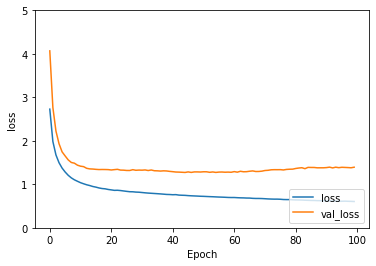

In [13]:
# Plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 5])
plt.legend(loc='lower right')

In [14]:
# import test data
Ytest = loadmat('D:/Final_project/matlab_code/Data/data-test.mat')
Xtest = loadmat('D:/Final_project/matlab_code/Data/testImages.mat')
print(Ytest.keys())
print(Xtest.keys())

x_test = Xtest['Images']
y_test = Ytest['Y']

# Normalize test data
y_test = y_test.reshape(-1,)
y_test = (y_test-np.mean(y_test))/np.std(y_test)

x_test = x_test.reshape(-1,50,50,1)
y_test = y_test.reshape(-1,1)

dict_keys(['__header__', '__version__', '__globals__', 'Y'])
dict_keys(['__header__', '__version__', '__globals__', 'Images', 'Y', 'None', 'num_images', 'padding', 'predictedY_train', 'predictedY_validation', 'siz', 'trainY', 'validationY', '__function_workspace__'])


d:\Anaconda\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [15]:
score = model.evaluate(x_validation, y_validation, verbose=2)
print('Test loss:', score)

4/4 - 0s - loss: 1.3934 - 67ms/epoch - 17ms/step
Test loss: 1.3934338092803955


In [16]:
# plot training fit
from sklearn.metrics import r2_score
y_pred_train = model.predict(x_train)
r2 = r2_score(y_train, y_pred_train)
print('r2 score for training is', r2)

y_pred_train = y_pred_train.reshape(-1,)
y_train= y_train.reshape(-1,)
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual Strain Energy')
plt.ylabel('Predicted Strain Energy')

plt.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, y_pred_train, 1))(np.unique(y_train)))

plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2)
plt.axis([-4, 4, -4, 4])
plt.show()

# plot validation fit
y_pred_validation = model.predict(x_validation)
r2 = r2_score(y_validation, y_pred_validation)
print('r2 score for validation is', r2)

y_pred_validation = y_pred_validation.reshape(-1,)
y_validation= y_validation.reshape(-1,)
plt.scatter(y_validation,y_pred_validation)
plt.xlabel('Actual Strain Energy')
plt.ylabel('Predicted Strain Energy')

plt.plot(np.unique(y_validation), np.poly1d(np.polyfit(y_validation, y_pred_validation, 1))(np.unique(y_validation)))

plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2)
plt.axis([-4, 4, -4, 4])
plt.show()

# plot test fit
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print('r2 score for test is', r2)

y_pred = y_pred.reshape(-1,)
y_test = y_test.reshape(-1,)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Strain Energy')
plt.ylabel('Predicted Strain Energy')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))

plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2)
plt.axis([-4, 4, -4, 4])
plt.show()

NameError: name 'r2_score' is not defined